# Statistics for Data Science with Python
## Module 7 Assignment

## Setup
Code provided by instructors 

In [26]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Assignment

### Part 1
* For the "Median value of owner-occupied homes" provide a boxplot

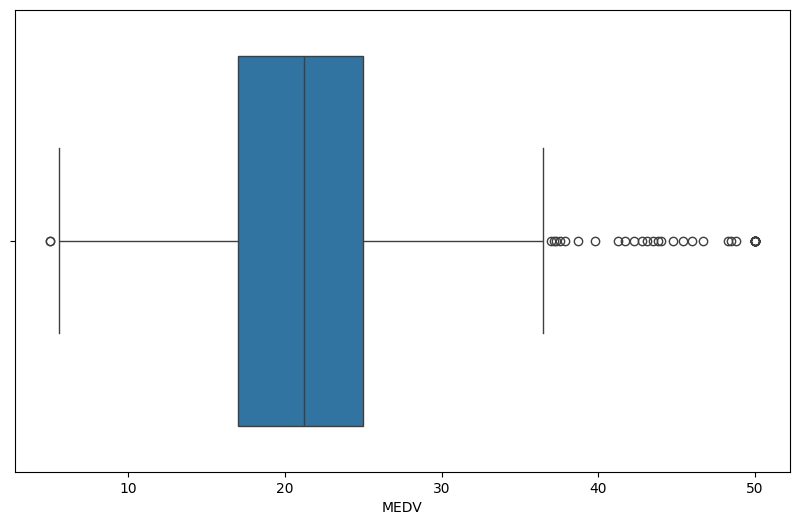

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(boston_df,x='MEDV',)
plt.show()

* Provide a  bar plot for the Charles river variable

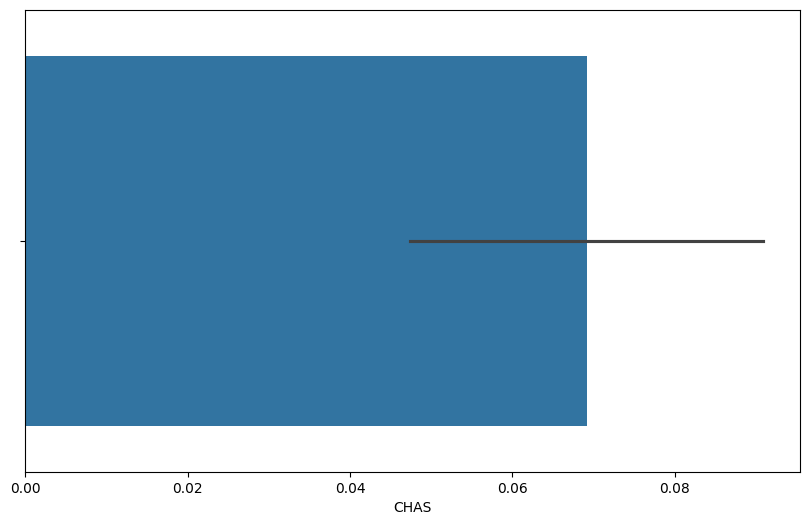

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(boston_df,x='CHAS')
plt.show()

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


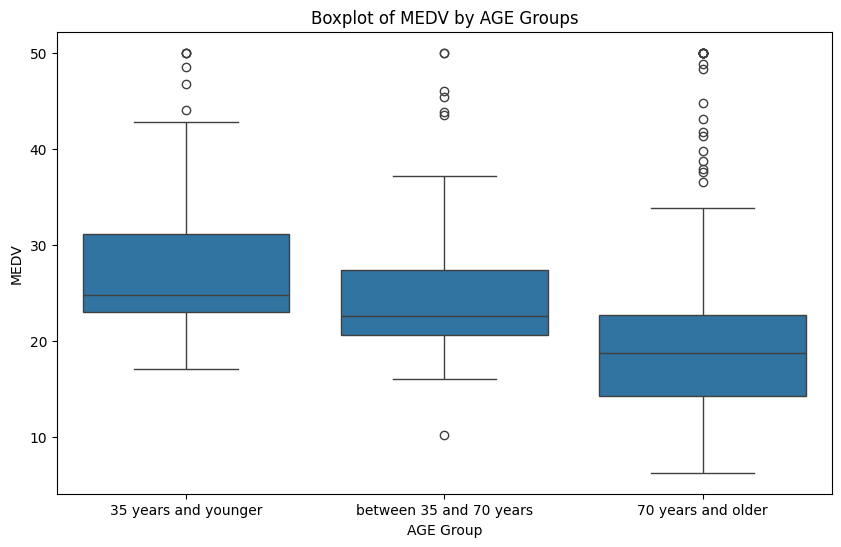

In [48]:
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by AGE Groups')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


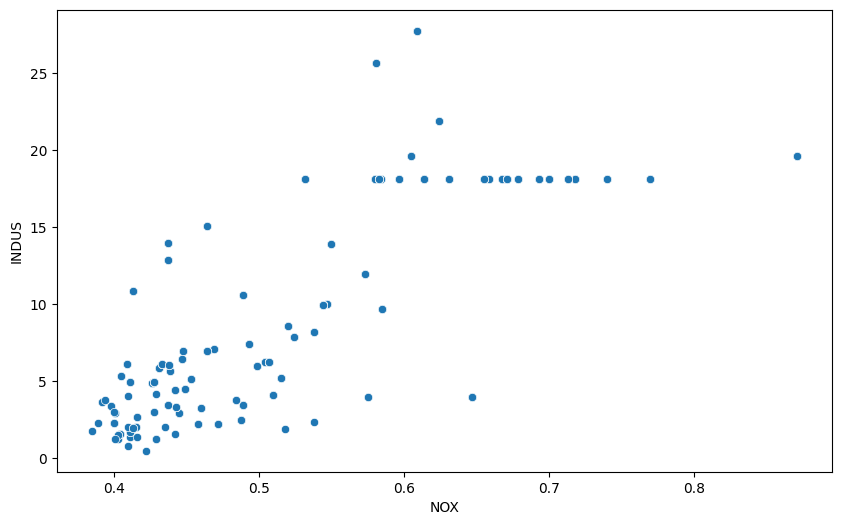

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(boston_df,x='NOX', y='INDUS')
plt.show()

* Create a histogram for the pupil to teacher ratio variable


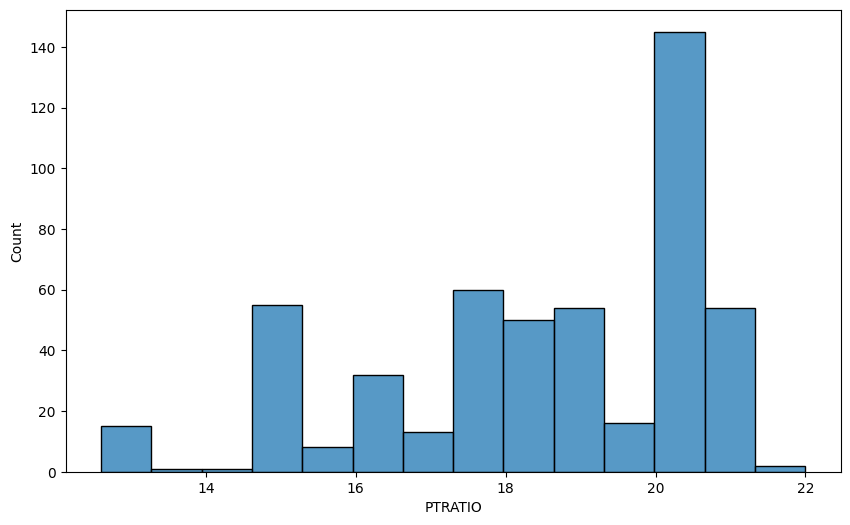

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(boston_df,x='PTRATIO')
plt.show()

## Part 2
Be sure to:

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



In [41]:
#H0: mean1 = mean2 of MEDV, H1: mean1 != mean2

t_stat, p_val =stats.ttest_ind(boston_df[boston_df.CHAS.astype(int)==1].MEDV,boston_df[boston_df.CHAS.astype(int)==0].MEDV)
print("t-statistic:", t_stat)
print("p-value:", p_val)

#pval < 0.05 -> H0 rejected

t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05


* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [55]:
#H0: mean1 = mean2 = mean3 = ...
#H1: at least one mean different for different age groups

groups = [boston_df[boston_df['AGE_group'] == g]['MEDV'] for g in boston_df['AGE_group'].unique() if not pd.isna(g)]
f_stat, p_val = stats.f_oneway(*groups)
print("t-statistic:", t_stat)
print("p-value:", p_val)

#p< 0.05 -> H0 rejected

t-statistic: 3.996437466090509
p-value: 3.435569235360708e-13


* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [58]:
#h0: correlation = 0
#h1: correlation != 0

corr_coef, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_val)

#p<<0.05 -> reject h0

Pearson correlation coefficient: 0.7636514469209155
p-value: 7.913361061237816e-98


* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [68]:
x = boston_df['DIS']
x = sm.add_constant(x)
model = sm.OLS(boston_df['MEDV'],x)
results = model.fit()

# Print summary of regression results
print(results.summary())

#on avearage, the median value of owner occupied homes increases by 1.1k USD per weighted distance unit further away to the five Boston employment centres

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        22:44:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0